In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import xgboost as xgb
import json
from pprint import pprint

Esta análise é relacionada apenas a seleção de campeões e spells que influenciarão no resultado da partida

## Lendo dados do DataSet

In [47]:
# Leitura dos Dataset
df = pd.read_csv("games.csv")
print(df.shape)


(51490, 61)


### DataSet Pre Partida

In [48]:
#filtragem das colunas necessárias
labels_desejadas = [
    'seasonId', 'winner', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1',
    't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1',
    't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't1_ban1', 't1_ban2', 't1_ban3',
    't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1',
    't2_champ2_sum2', 't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
    't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2', 't2_ban1', 't2_ban2', 't2_ban3',
    't2_ban4', 't2_ban5'
]

df = df[labels_desejadas]
df.shape

(51490, 42)

In [49]:
df = df.fillna(0)
df

seasonId  winner  t1_champ1id  t1_champ1_sum1  t1_champ1_sum2  \
0             9       1            8              12               4   
1             9       1          119               7               4   
2             9       1           18               4               7   
3             9       1           57               4              12   
4             9       1           19               4              12   
...         ...     ...          ...             ...             ...   
51485         9       2           19              12               4   
51486         9       2           90               4              14   
51487         9       2          141              11               4   
51488         9       2          121              11               4   
51489         9       1           89               3               4   

       t1_champ2id  t1_champ2_sum1  t1_champ2_sum2  t1_champ3id  \
0              432               3               4           96   
1               39              12               4           76   
2              141              11               4          267   
3               63               4              14           29   
4               29              11               4           40   
...            ...             ...             ...          ...   
51485          429               4               7           91   
51486           32               4              11           31   
51487           18               7               4          432   
51488          236               4               7          420   
51489            1               4              14          164   

       t1_champ3_sum1  ...  t2_champ4_sum1  t2_champ4_sum2  t2_champ5id  \
0                   4  ...              14               4          412   
1                   4  ...               4              14           92   
2                   3  ...               4              11           22   
3                   4  ...               4              14           22   
4                   4  ...               4              12           51   
...               ...  ...             ...             ...          ...   
51485               4  ...               3               4           79   
51486              12  ...               4              12           45   
51487               3  ...              12               4           99   
51488               4  ...              12               4           11   
51489               4  ...              11               4           58   

       t2_champ5_sum1  t2_champ5_sum2  t2_ban1  t2_ban2  t2_ban3  t2_ban4  \
0                   4               3      114       67       43       16   
1                   4               7       11       67      238       51   
2                   7               4      157      238      121       57   
3                   4               7      164       18      141       40   
4                   4               7       86       11      201      122   
...               ...             ...      ...      ...      ...      ...   
51485              11               4       55       -1       90      238   
51486              14               4      157       55      119      154   
51487              14               4      113      122       53       11   
51488              11               4      154       39       51       90   
51489              12               4       11      157      141       31   

       t2_ban5  
0           51  
1          420  
2           28  
3           51  
4           18  
...        ...  
51485      157  
51486      105  
51487      157  
51488      114  
51489       18  

[51490 rows x 42 columns]

### Lendo os Dados do Arquivos auxiliares

* summoner_spell_info.json
* champion_info_2.json

In [50]:
if(False): # Código para gerar 'champions_info_modified'
    champions_info_df = pd.read_json('champions_info_modified.json')
    # print(champions_info_df.head())
    # print(summoner_spell_info_df.head())
    champions_info_df = champions_info_df['data'] 
    champions_info_transposed = champions_info_df.transpose()
    print(champions_info_transposed)
    # Lendo o arquivo summoner_spell_info.json
    summoner_spell_info_df = pd.read_json('summoner_spell_info.json')

#### Leitura dos Dados de Campeão

In [51]:
with open('champions_info_modified.json') as file:
    champions_data = json.load(file)

In [52]:
#Adicionando os campos relacionados as tags de cada campeão
for i in [1,2]:
    for j in np.arange(1,6):
        df[f't{i}_champion{j}_tags'] = df[f't{i}_champ{j}id'].map(lambda x: champions_data['data'][str(int(x))]['tags'] if pd.notnull(x) else None)
# df_encoded = pd.get_dummies(df, columns=['champion_name', 'champion_tags'])
# df_encoded
df

seasonId  winner  t1_champ1id  t1_champ1_sum1  t1_champ1_sum2  \
0             9       1            8              12               4   
1             9       1          119               7               4   
2             9       1           18               4               7   
3             9       1           57               4              12   
4             9       1           19               4              12   
...         ...     ...          ...             ...             ...   
51485         9       2           19              12               4   
51486         9       2           90               4              14   
51487         9       2          141              11               4   
51488         9       2          121              11               4   
51489         9       1           89               3               4   

       t1_champ2id  t1_champ2_sum1  t1_champ2_sum2  t1_champ3id  \
0              432               3               4           96   
1               39              12               4           76   
2              141              11               4          267   
3               63               4              14           29   
4               29              11               4           40   
...            ...             ...             ...          ...   
51485          429               4               7           91   
51486           32               4              11           31   
51487           18               7               4          432   
51488          236               4               7          420   
51489            1               4              14          164   

       t1_champ3_sum1  ...     t1_champion1_tags     t1_champion2_tags  \
0                   4  ...          [Mage, Tank]       [Support, Mage]   
1                   4  ...            [Marksman]   [Fighter, Assassin]   
2                   3  ...  [Marksman, Assassin]   [Fighter, Assassin]   
3                   4  ...          [Tank, Mage]                [Mage]   
4                   4  ...       [Fighter, Tank]  [Marksman, Assassin]   
...               ...  ...                   ...                   ...   
51485               4  ...       [Fighter, Tank]            [Marksman]   
51486              12  ...      [Mage, Assassin]          [Tank, Mage]   
51487               3  ...   [Fighter, Assassin]  [Marksman, Assassin]   
51488               4  ...   [Assassin, Fighter]            [Marksman]   
51489               4  ...       [Tank, Support]                [Mage]   

          t1_champion3_tags    t1_champion4_tags     t1_champion5_tags  \
0          [Marksman, Mage]  [Assassin, Fighter]                [Mage]   
1       [Assassin, Fighter]   [Fighter, Support]            [Assassin]   
2           [Support, Mage]      [Fighter, Mage]      [Assassin, Mage]   
3      [Marksman, Assassin]      [Mage, Support]       [Fighter, Tank]   
4           [Support, Mage]           [Marksman]       [Mage, Support]   
...                     ...                  ...                   ...   
51485   [Assassin, Fighter]      [Support, Mage]   [Fighter, Assassin]   
51486          [Tank, Mage]   [Support, Fighter]  [Marksman, Assassin]   
51487       [Support, Mage]     [Marksman, Mage]       [Fighter, Mage]   
51488       [Fighter, Tank]      [Support, Tank]       [Mage, Support]   
51489       [Fighter, Tank]      [Tank, Fighter]  [Marksman, Assassin]   

       t2_champion1_tags     t2_champion2_tags     t2_champion3_tags  \
0             [Marksman]            [Marksman]       [Fighter, Tank]   
1        [Tank, Fighter]       [Mage, Support]       [Fighter, Tank]   
2                 [Mage]    [Support, Fighter]   [Fighter, Marksman]   
3       [Mage, Assassin]       [Fighter, Tank]    [Support, Fighter]   
4        [Support, Mage]       [Tank, Fighter]   [Fighter, Assassin]   
...                  ...                   ...                   ...   
51485             [Mage]       [Fighter, Tank]  [Marksm

In [59]:
# Defina a tag desejada
tag_desejada = 'Support'

# Filtrar as partidas que possuem um campeão com a tag desejada
partidas_com_tag = df.loc[
    (df['t1_champion1_tags'].apply(lambda tags: tag_desejada in tags)) |
    (df['t1_champion2_tags'].apply(lambda tags: tag_desejada in tags)) |
    (df['t1_champion3_tags'].apply(lambda tags: tag_desejada in tags)) |
    (df['t1_champion4_tags'].apply(lambda tags: tag_desejada in tags)) |
    (df['t1_champion5_tags'].apply(lambda tags: tag_desejada in tags)) |
    (df['t2_champion1_tags'].apply(lambda tags: tag_desejada in tags)) |
    (df['t2_champion2_tags'].apply(lambda tags: tag_desejada in tags)) |
    (df['t2_champion3_tags'].apply(lambda tags: tag_desejada in tags)) |
    (df['t2_champion4_tags'].apply(lambda tags: tag_desejada in tags)) |
    (df['t2_champion5_tags'].apply(lambda tags: tag_desejada in tags))
]

partidas_com_tag

seasonId  winner  t1_champ1id  t1_champ1_sum1  t1_champ1_sum2  \
0             9       1            8              12               4   
1             9       1          119               7               4   
2             9       1           18               4               7   
3             9       1           57               4              12   
4             9       1           19               4              12   
...         ...     ...          ...             ...             ...   
51485         9       2           19              12               4   
51486         9       2           90               4              14   
51487         9       2          141              11               4   
51488         9       2          121              11               4   
51489         9       1           89               3               4   

       t1_champ2id  t1_champ2_sum1  t1_champ2_sum2  t1_champ3id  \
0              432               3               4           96   
1               39              12               4           76   
2              141              11               4          267   
3               63               4              14           29   
4               29              11               4           40   
...            ...             ...             ...          ...   
51485          429               4               7           91   
51486           32               4              11           31   
51487           18               7               4          432   
51488          236               4               7          420   
51489            1               4              14          164   

       t1_champ3_sum1  ...     t1_champion1_tags     t1_champion2_tags  \
0                   4  ...          [Mage, Tank]       [Support, Mage]   
1                   4  ...            [Marksman]   [Fighter, Assassin]   
2                   3  ...  [Marksman, Assassin]   [Fighter, Assassin]   
3                   4  ...          [Tank, Mage]                [Mage]   
4                   4  ...       [Fighter, Tank]  [Marksman, Assassin]   
...               ...  ...                   ...                   ...   
51485               4  ...       [Fighter, Tank]            [Marksman]   
51486              12  ...      [Mage, Assassin]          [Tank, Mage]   
51487               3  ...   [Fighter, Assassin]  [Marksman, Assassin]   
51488               4  ...   [Assassin, Fighter]            [Marksman]   
51489               4  ...       [Tank, Support]                [Mage]   

          t1_champion3_tags    t1_champion4_tags     t1_champion5_tags  \
0          [Marksman, Mage]  [Assassin, Fighter]                [Mage]   
1       [Assassin, Fighter]   [Fighter, Support]            [Assassin]   
2           [Support, Mage]      [Fighter, Mage]      [Assassin, Mage]   
3      [Marksman, Assassin]      [Mage, Support]       [Fighter, Tank]   
4           [Support, Mage]           [Marksman]       [Mage, Support]   
...                     ...                  ...                   ...   
51485   [Assassin, Fighter]      [Support, Mage]   [Fighter, Assassin]   
51486          [Tank, Mage]   [Support, Fighter]  [Marksman, Assassin]   
51487       [Support, Mage]     [Marksman, Mage]       [Fighter, Mage]   
51488       [Fighter, Tank]      [Support, Tank]       [Mage, Support]   
51489       [Fighter, Tank]      [Tank, Fighter]  [Marksman, Assassin]   

       t2_champion1_tags     t2_champion2_tags     t2_champion3_tags  \
0             [Marksman]            [Marksman]       [Fighter, Tank]   
1        [Tank, Fighter]       [Mage, Support]       [Fighter, Tank]   
2                 [Mage]    [Support, Fighter]   [Fighter, Marksman]   
3       [Mage, Assassin]       [Fighter, Tank]    [Support, Fighter]   
4        [Support, Mage]       [Tank, Fighter]   [Fighter, Assassin]   
...                  ...                   ...                   ...   
51485             [Mage]       [Fighter, Tank]  [Marksm

## Processo de Treino

In [7]:
#Pegando a coluna a ser analisada(Quem venceu)
x = df.drop(['winner'], axis=1).values 
y = df['winner']

In [8]:
# Separando Teste(20) e Treino(80)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [60]:
# Escalonando


# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(trainData)
# X_test_scaled = scaler.transform(testData)

In [9]:

# Modelos
# Decision Tree
# KNN
# Regrassão Logistica
# Random Forest
# Redes Neurais
# 
# Criando o objeto do modelo KNN



def KNNTrain(X_train,X_test, y_train,y_test , k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred  = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("k = {}, accuracy: {:.3f}%".format(k, accuracy*100))
    return accuracy


In [11]:
kRange = range(3,30,2)
accuracies = []
for k in kRange:
    accuracy = KNNTrain(X_train,X_test, y_train,y_test , k)
    accuracies.append(accuracy)

accuracy: 50.447%
accuracy: 50.291%
accuracy: 50.466%
accuracy: 50.379%
accuracy: 50.126%
accuracy: 50.272%
accuracy: 50.437%
accuracy: 50.932%
accuracy: 50.787%
accuracy: 50.544%
accuracy: 50.787%
accuracy: 50.806%
accuracy: 50.719%
accuracy: 50.651%


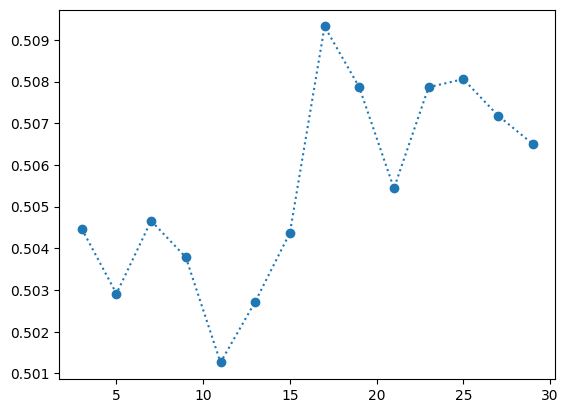

In [12]:
plt.plot(kRange, accuracies, 'o:')

### Árvore de Decisão

In [63]:
def DecisionTreeTrain(X_train,X_test, y_train,y_test):
    # Inicializa o classificador de árvore de decisão
    model = DecisionTreeClassifier()
    # Treina o modelo com os dados de treinamento
    model.fit(X_train, y_train)
    # Realiza a predição nos dados de teste
    y_pred = model.predict(X_test)
    # Calcula a acurácia do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy: {:.3f}%".format(accuracy*100))
    return accuracy

In [64]:
DecisionTreeTrain(X_train,X_test, y_train,y_test)

accuracy: 95.747%


0.9574674694115363

### Random Florest

In [65]:
def RandomForestTrain(X_train,X_test, y_train,y_test):
    # Inicializa o classificador de árvore de decisão
    model = RandomForestClassifier()
    # Treina o modelo com os dados de treinamento
    model.fit(X_train, y_train)
    # Realiza a predição nos dados de teste
    y_pred = model.predict(X_test)
    # Calcula a acurácia do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy: {:.3f}%".format(accuracy*100))
    return accuracy

In [66]:
RandomForestTrain(X_train,X_test, y_train,y_test)

accuracy: 96.883%


0.968828898815304

### Regreção Logistica

In [67]:
def LogisticRegressionTrain(X_train,X_test, y_train,y_test):
    # Criar um objeto de regressão logística
    model = LogisticRegression()

    # Treinar o modelo de regressão logística usando os dados de treinamento
    model.fit(X_train, y_train)

    # Fazer previsões usando os dados de teste
    y_pred = model.predict(X_test)

    # Calcular a acurácia do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy: {:.3f}%".format(accuracy*100))
    return accuracy

In [68]:
LogisticRegressionTrain(X_train,X_test, y_train,y_test)

accuracy: 95.805%


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9580501068168576

### Gradient Boosting

In [69]:
# Definir os parâmetros do modelo
xgBoostParams = {
    'objective': 'binary:logistic',  # Para classificação binária
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'n_estimators': 100
}
def XGBoostTrain(X_train,X_test, y_train,y_test, params = xgBoostParams):
    y_train = y_train.map({1: 0, 2: 1})
    y_test = y_test.map({1: 0, 2: 1})
    # Criar o objeto do modelo de Gradient Boosting
    model = xgb.XGBClassifier(**params)

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões usando os dados de teste
    y_pred = model.predict(X_test)

    # Calcular a acurácia do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy: {:.3f}%".format(accuracy*100))
    return accuracy

In [70]:
XGBoostTrain(X_train,X_test, y_train,y_test)

accuracy: 97.077%


0.9707710234997087

### Neural Network

In [71]:
def NeuralNetworkTrain(X_train, X_test, y_train, y_test, input_dim):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compilar o modelo
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    # Treinar o modelo
    model.fit(X_train, y_train, epochs=10, batch_size=32)
    # Fazer previsões usando os dados de teste
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5)  # Converter as previsões em rótulos binários
    # Calcular a acurácia do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy: {:.3f}%".format(accuracy*100))
    return accuracy

In [72]:
feature_names = df.drop(['winner'], axis=1).columns.tolist()
input_dim = len(feature_names)
NeuralNetworkTrain(X_train, X_test, y_train, y_test, input_dim)

Epoch 1/10
1288/1288 [==============================] - 2s 1ms/step - loss: -14037290.0000 - accuracy: 0.5039
Epoch 2/10
1288/1288 [==============================] - 2s 1ms/step - loss: -177954128.0000 - accuracy: 0.5061
Epoch 3/10
1288/1288 [==============================] - 2s 1ms/step - loss: -641251392.0000 - accuracy: 0.5061
Epoch 4/10
1288/1288 [==============================] - 2s 1ms/step - loss: -1475433344.0000 - accuracy: 0.5061
Epoch 5/10
1288/1288 [==============================] - 2s 1ms/step - loss: -2731799808.0000 - accuracy: 0.5061
Epoch 6/10
1288/1288 [==============================] - 2s 1ms/step - loss: -4458187776.0000 - accuracy: 0.5061
Epoch 7/10
1288/1288 [==============================] - 2s 1ms/step - loss: -6701805056.0000 - accuracy: 0.5061
Epoch 8/10
1288/1288 [==============================] - 2s 1ms/step - loss: -9522278400.0000 - accuracy: 0.5061
Epoch 9/10
1288/1288 [==============================] - 2s 1ms/step - loss: -12970469376.0000 - accuracy: 0.

0.5079627112060594